## 💪 Competition challenge

In this first level, you’ll explore and summarise the dataset to understand its structure and key statistics. If you want to push yourself further, check out level two!
Create a report that answers the following:
- How many records are in the dataset, and what is the range of years covered?
- What is the average salary (in USD) for Data Scientists and Data Engineers? Which role earns more on average?
- How many full-time employees based in the US work 100% remotely?

## 📖 Executive Summary
This data analysis explores salaries and remote working in the US, identifying the current talent management strategy is applied, with focus on attracting and retaining top talent in the competitive tech industry. 

Summary data from the period 2020-2024 shows that Data Scientist are paid an average of $10K more than Data Engineers, with the largest average salary difference ($19K) in small sized companies and the smalles average salary difference ($3.5K) in large companies. Remote working is a highly sought after benefit with more than 20% of the company's data scientist/engineers working 100% remotely. 

In [20]:
import pandas as pd
salaries_df = pd.read_csv('salaries.csv')
salaries_df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Developer,168276,USD,168276,US,0,US,M
1,2024,MI,FT,Developer,112184,USD,112184,US,0,US,M
2,2024,EN,FT,Developer,180000,USD,180000,US,0,US,M
3,2024,EN,FT,Developer,133500,USD,133500,US,0,US,M
4,2024,EN,FT,Developer,122000,USD,122000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
57189,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
57190,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
57191,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
57192,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [21]:
import pandas as pd

salaries_df = pd.read_csv('salaries.csv')

# Explore the data
print(salaries_df.info())
print(salaries_df.describe())
print(f"Company sizes are {salaries_df['company_size'].unique()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57194 entries, 0 to 57193
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           57194 non-null  int64 
 1   experience_level    57194 non-null  object
 2   employment_type     57194 non-null  object
 3   job_title           57194 non-null  object
 4   salary              57194 non-null  int64 
 5   salary_currency     57194 non-null  object
 6   salary_in_usd       57194 non-null  int64 
 7   employee_residence  57194 non-null  object
 8   remote_ratio        57194 non-null  int64 
 9   company_location    57194 non-null  object
 10  company_size        57194 non-null  object
dtypes: int64(4), object(7)
memory usage: 4.8+ MB
None
          work_year        salary  salary_in_usd  remote_ratio
count  57194.000000  5.719400e+04   57194.000000  57194.000000
mean    2023.776305  1.641818e+05  159223.565829     22.211246
std        0.519883  2.

How many records are in the dataset, and what is the range of years covered?

In [22]:
num_records = salaries_df.shape[0]
year_range = salaries_df['work_year'].unique()
print(f"There are {num_records} records' with data covering a 5-year period, {year_range.min()} to {year_range.max()}.")

There are 57194 records' with data covering a 5-year period, 2020 to 2024.


What is the average salary (in USD) for Data Scientists and Data Engineers? Which role earns more on average?

In [23]:
#filter for jobs - Data Scientist and Data Engineer
data_scientist = salaries_df[salaries_df['job_title']=='Data Scientist']
data_engineer = salaries_df[salaries_df['job_title']=='Data Engineer']

#find average salary for jobs
avg_scientist_salary = round(data_scientist['salary_in_usd'].mean())
avg_engineer_salary = round(data_engineer['salary_in_usd'].mean())
print(f'Average Data Scientist salary: ${avg_scientist_salary:,d}')
print(f'Average Data Engineer salary: ${avg_engineer_salary:,d}')
print(f'On average, Data Scientists earn ${avg_scientist_salary-avg_engineer_salary:,d} more than Data Engineers')

#slice for different company sizes
smallco = salaries_df[salaries_df['company_size']=='S']
mediumco = salaries_df[salaries_df['company_size']=='M']
largeco = salaries_df[salaries_df['company_size']=='L']

# Create dictionary for company sizes
company_sizes = {
    'smallco': smallco,
    'mediumco': mediumco,
    'largeco': largeco
}

# Store the average salaries
average_salaries = {}

# use loop to find the average salaries for different company sizes, include both jobs - Data Scientist and Data Engineer
for company, dataframe in company_sizes.items():
    average_salaries[f'{company}_data_scientist'] = dataframe[dataframe['job_title'] == 'Data Scientist']['salary_in_usd'].mean()
    average_salaries[f'{company}_data_engineer'] = dataframe[dataframe['job_title'] == 'Data Engineer']['salary_in_usd'].mean()

#find the average salaries for Data Engineers in different company sizes
print(f"\nComparison of average salaries based on company size \n\t\t\t\tSmall Company\tMedium Company\tLarge Company")
print(f"Data Scientist\t${round(average_salaries['smallco_data_scientist']):,d}\t\t\t${round(average_salaries['mediumco_data_scientist']):,d}\t\t${round(average_salaries['largeco_data_scientist']):,d}")
print(f"Data Engineer\t${round(average_salaries['smallco_data_engineer']):,d}\t\t\t${round(average_salaries['mediumco_data_engineer']):,d}\t\t${round(average_salaries['largeco_data_engineer']):,d}")

Average Data Scientist salary: $159,397
Average Data Engineer salary: $149,315
On average, Data Scientists earn $10,082 more than Data Engineers

Comparison of average salaries based on company size 
				Small Company	Medium Company	Large Company
Data Scientist	$80,836			$160,383		$136,764
Data Engineer	$61,114			$149,695		$139,263


How many full-time employees based in the US work 100% remotely?

In [24]:
#filter for US based employees
US_employees = salaries_df[salaries_df['employee_residence']=='US']
full_time_US = US_employees[US_employees['employment_type']=='FT'].shape[0]

#filter for full-time remote workers
full_time_remote_US = US_employees[(US_employees['employment_type']=='FT') & (US_employees['remote_ratio']==100)]
print(f"There are {full_time_US:,d} employees in the US with more than 20% ({full_time_remote_US.shape[0]:,d} employees) working 100% remotely")


There are 51,710 employees in the US with more than 20% (11,125 employees) working 100% remotely


Let's see how a comparison of the remote ratios for Data Scientists and Data Engineers.

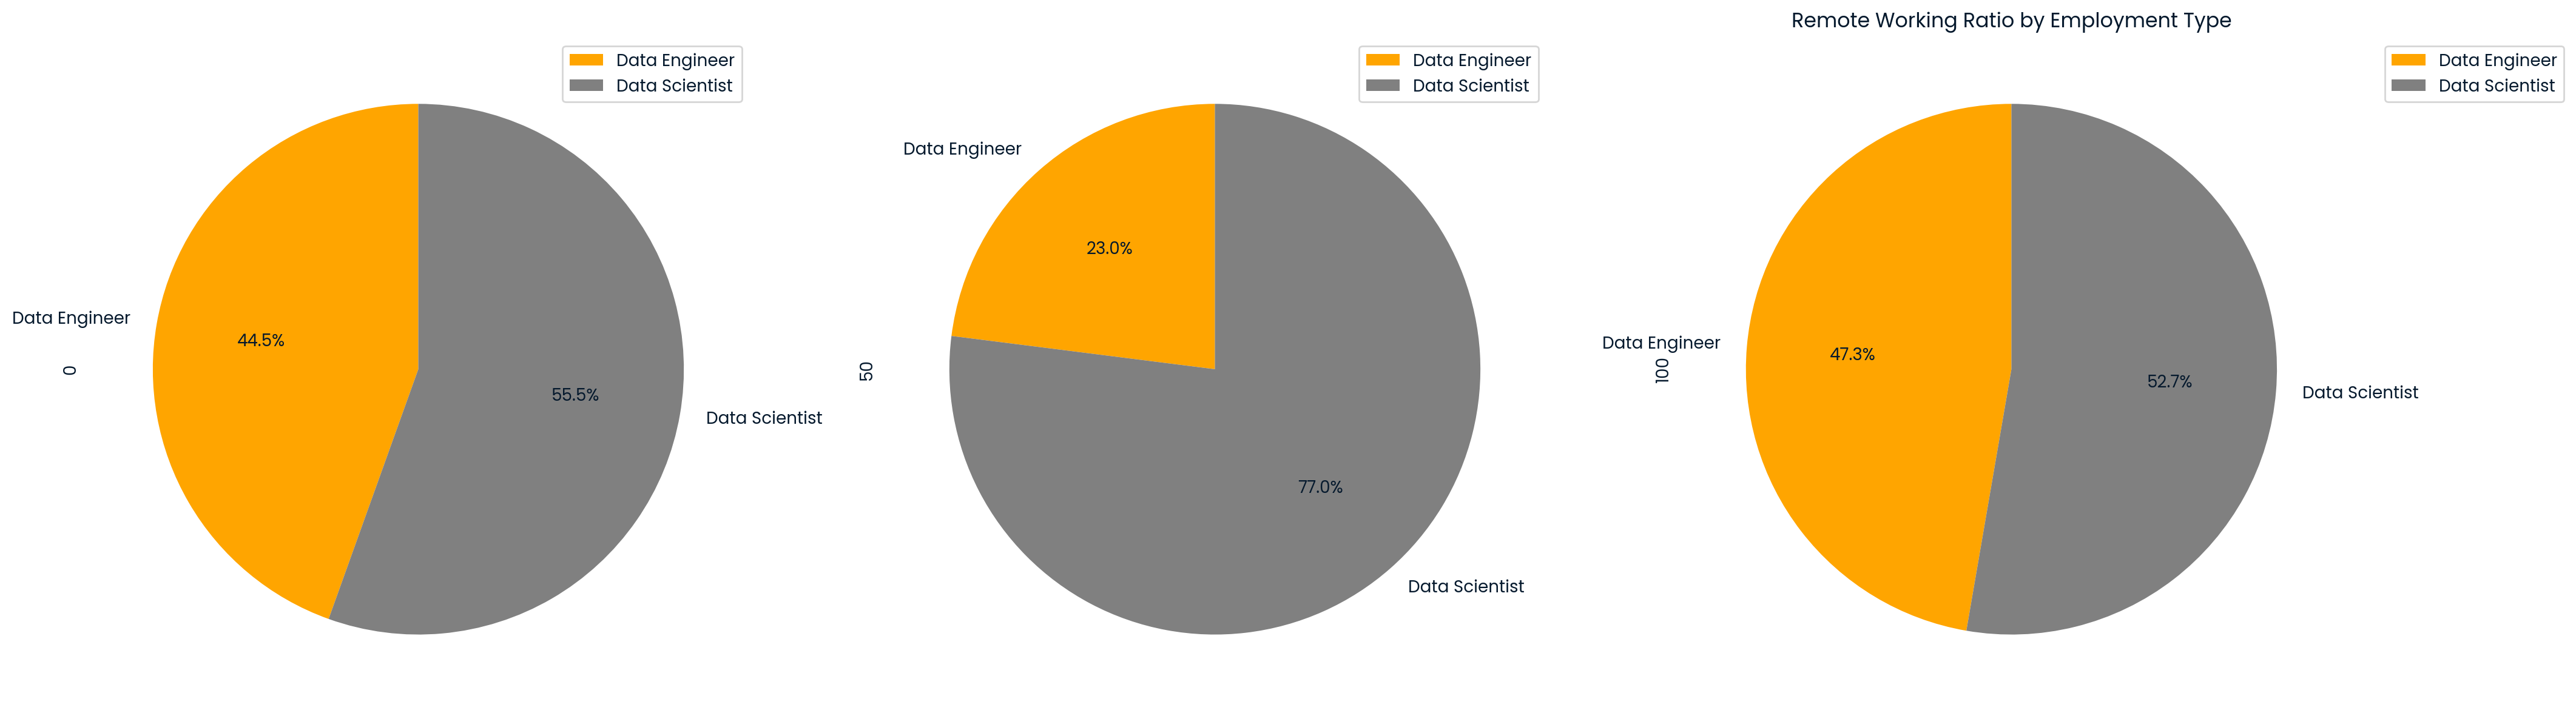

In [25]:
import matplotlib.pyplot as plt

#compare remote ratios for Data Scientist and Data Engineer job titles across the company
data_jobs_all = salaries_df[salaries_df['job_title'].isin(['Data Scientist', 'Data Engineer'])]
remote_jobs = data_jobs_all[['job_title', 'remote_ratio', 'salary_in_usd']]

#group by full-time employment type, job title and remote ratio
remote_workers = remote_jobs.groupby(['job_title','remote_ratio'])['salary_in_usd'].count()

#plot on bar chart
remote_data = remote_workers.unstack()
remote_data.plot.pie(
    subplots =True, 
    figsize =(24, 24), 
    autopct=lambda p: '{:.1f}%'.format(p) if p > 0 else '',  #display percentages, hide zeros
    startangle=90,  #start pie chart at a 90-degree angle
    colors=['orange', 'gray'],
    
)
plt.title('Remote Working Ratio by Employment Type')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Let's analyse the data for full-time Data Scientists and Data Engineers to see if there's a difference in their use of remote working arrangements. 

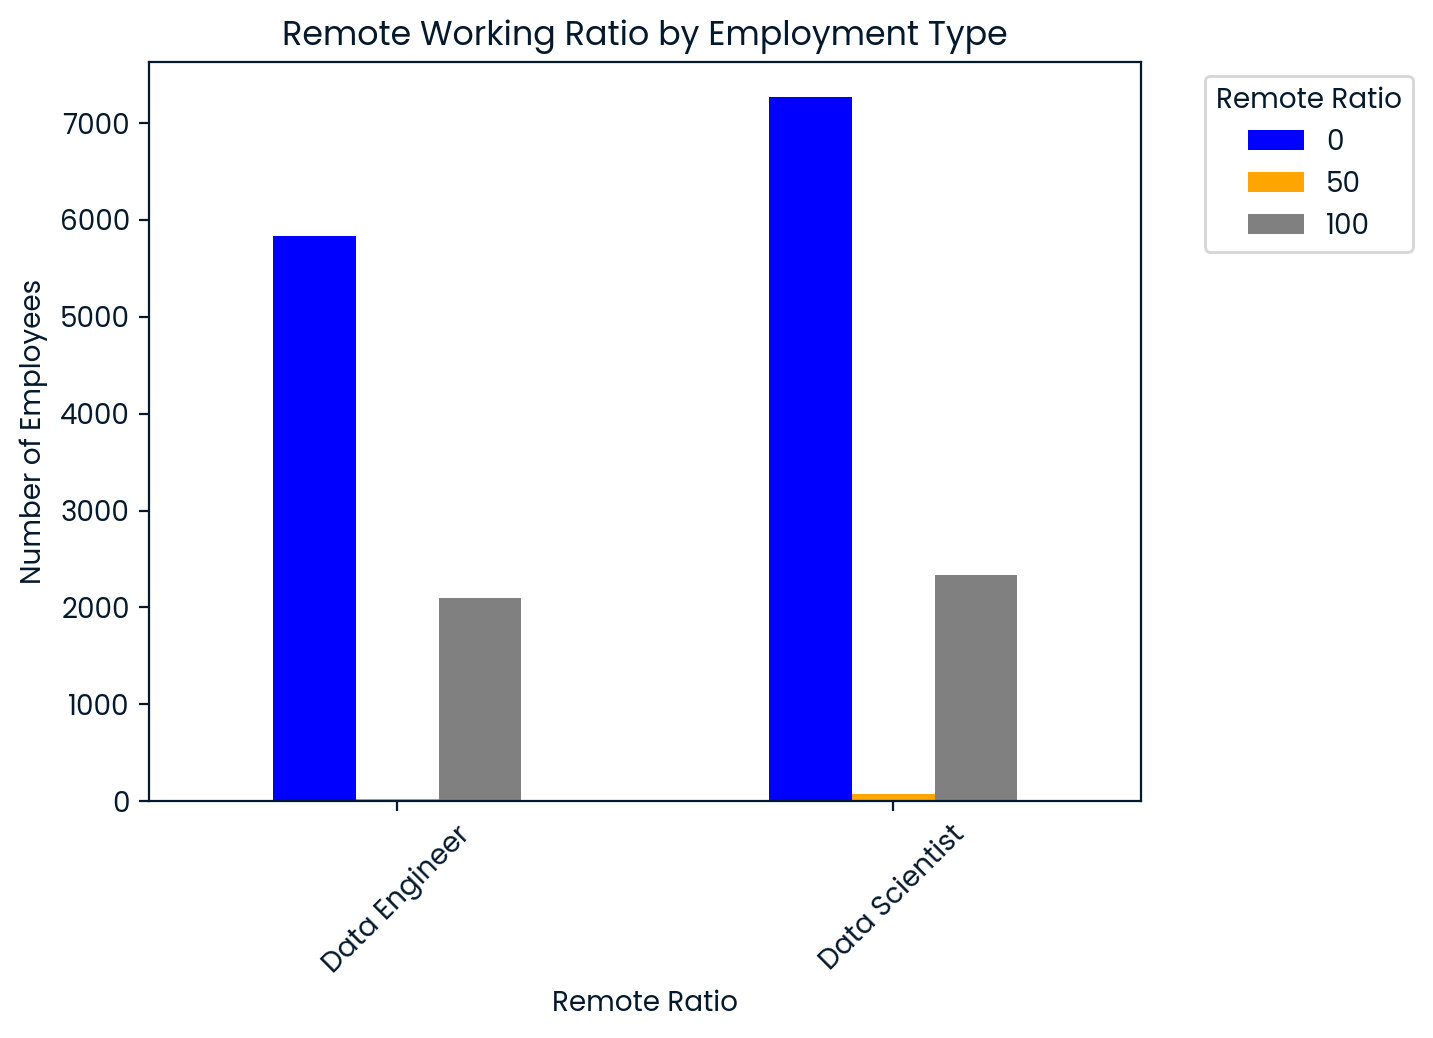

In [26]:
import numpy as np

#find full-time salaries for the job titles Data Scientist and Data Engineer
full_time = salaries_df[salaries_df['employment_type']=='FT']
data_jobs = full_time[full_time['job_title'].isin(['Data Scientist', 'Data Engineer'])]

#group by employment type and remote ratio
remote_jobs = data_jobs[['job_title', 'remote_ratio', 'salary_in_usd']]
remote_workers = remote_jobs.groupby(['job_title','remote_ratio'])['salary_in_usd'].count()

#plot on bar chart
remote_workers.unstack().plot(
    kind='bar', 
    xlabel='Remote Ratio', 
    ylabel='Number of Employees', 
    title='Remote Working Ratio by Employment Type', 
    color=['blue', 'orange', 'gray'], 
    rot=45)
plt.legend(title='Remote Ratio', 
           bbox_to_anchor=(1.05, 1), 
           loc='upper left')
plt.show()

## ⌛️ Time is ticking. Good luck!